# lista 4

In [1]:
import numpy as np, matplotlib.pyplot as plt

## zadanie 1

In [2]:
mc = 1000
n = np.linspace(1000, 10000, 10)
mi = 0
sigma = 1

In [3]:
teoretyczna = np.exp(1/2*(sigma**2 + 2*mi))
vars = []
Ys_ = {}

In [4]:
for i in range(mc):
    for k in n:
        X = np.random.normal(mi, sigma, int(k))
        Y = np.exp(X)
        y_ = 1/k * sum(Y)
        if k not in Ys_:
            Ys_[int(k)] = [y_]
        else:
            Ys_[int(k)].append(y_)
        # var = np.var(y_)


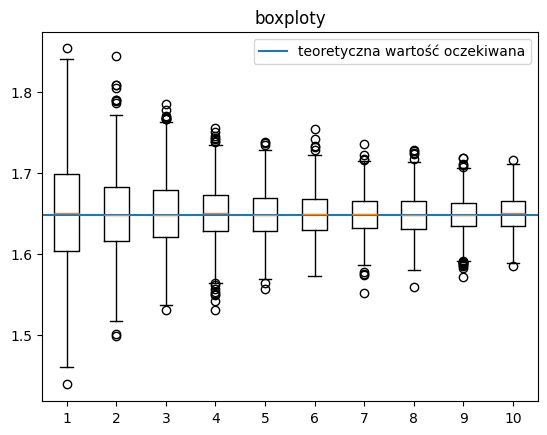

In [6]:
plt.boxplot(Ys_.values())
plt.axhline(y=teoretyczna, label = 'teoretyczna wartość oczekiwana')
plt.title('boxploty')
plt.legend()
plt.show()

In [7]:
for i in Ys_.values():
    vars.append(np.var(i))

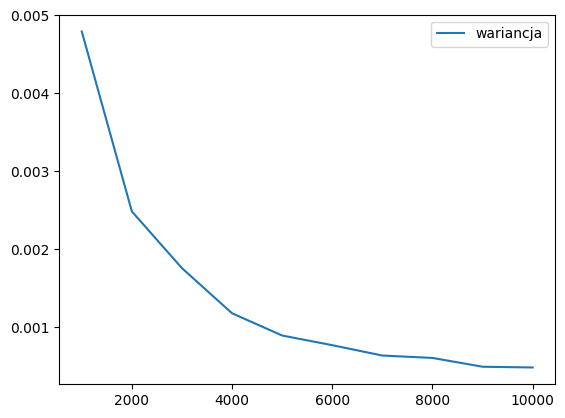

In [8]:
plt.plot(n,vars, label = 'wariancja')
plt.legend()
plt.show()

# zadanie 2

In [9]:
def F_u(u, Fx, n=1000):
    return Fx(u)**n


In [10]:
def f_u(u, Fx, fx, n=1000):
    return n*Fx(u)**(n-1)*fx(u)

### a) rozkład normalny

$\mu = 0, \sigma = 1$

In [36]:
from scipy. stats import norm, lognorm, pareto
import seaborn as sns, random

In [12]:
mc = 1000
mi = 0
sigma = 1
Us = []
for i in range(mc):
    X = np.random.normal(mi, sigma, 1000)
    U = max(X)
    Us.append(U)


In [13]:
def fu(u, n=1000):
    # n*norm.cdf((u - mi)/sigma)**(n-1)/(np.sqrt(2*np.pi)*sigma)*np.exp(-(u-mi)**2/(2*sigma**2))
    return n*norm.cdf(u,mi,sigma)**(n-1)*norm.pdf(u,mi,sigma)

In [14]:
def Fu(u, n=1000):
    return norm.cdf((u-mi)/sigma)**n

In [15]:
def demp(X, x):
    n = len(X)
    count = sum(1 for xi in X if xi <= x)
    return count / n
def drewdemp(X): # dystrybuanta empiryczna
    x_values = sorted(X)
    y_values = [demp(x_values, x) for x in x_values]
    plt.plot(x_values, y_values, label='empiryczna')
    plt.title('Wykres dystrybuant')
    
    plt.legend()
    plt.show()

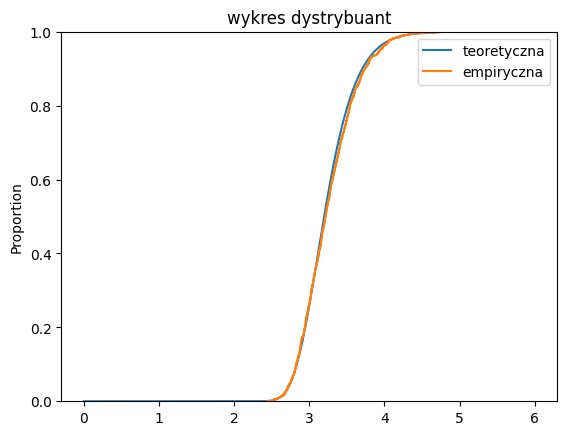

In [16]:
xs = np.linspace(0,6, 1000)
ys = sorted([Fu(x) for x in xs])
plt.plot(xs, ys, label= 'teoretyczna')
sns.ecdfplot(data = Us, label = 'empiryczna')
plt.legend()
plt.title('wykres dystrybuant')
plt.show()

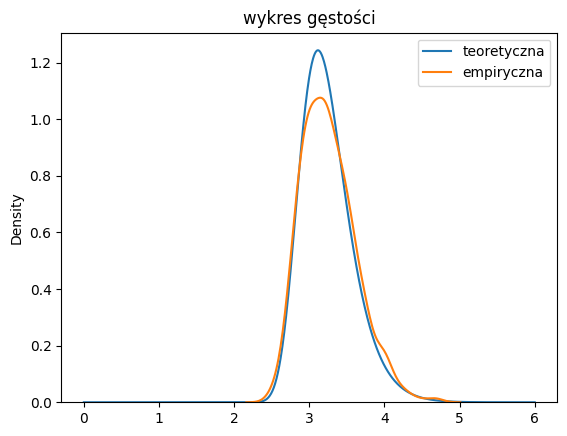

In [17]:
xs = np.linspace(0,6, 1000)
yss = [fu(x) for x in xs]
plt.plot(xs, yss, label= 'teoretyczna')
sns.kdeplot(data = Us, label = 'empiryczna')
plt.legend()
plt.title('wykres gęstości')
plt.show()

### b) rozkład log-normalny

$\mu =0, \sigma = 1$

In [18]:
mi = 0
sigma = 1

In [19]:
def fln(x):
    return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-1/2*(np.log(x)-mi)**2/sigma**2)

In [21]:
mc = 1000
mi = 0
sigma = 1
Us2 = []
for i in range(mc):
    Y = np.random.lognormal(mi, sigma, 1000)
    U = max(Y)
    Us2.append(U)

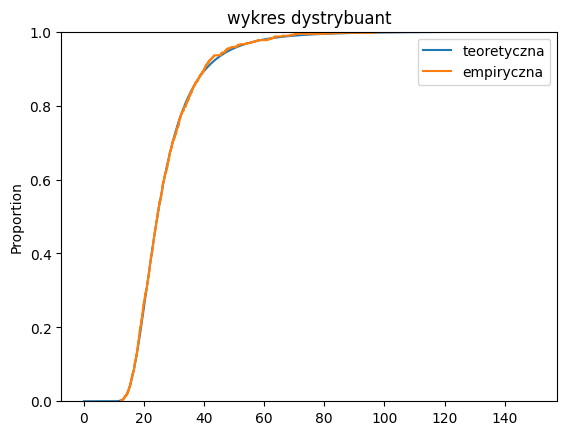

In [22]:
n=1000
xss = np.linspace(0,150, 1000)
ys = [lognorm.cdf(x,s=sigma,loc=0, scale=1)**n for x in xss]
plt.plot(xss, ys, label= 'teoretyczna')
sns.ecdfplot(data = Us2, label = 'empiryczna')
plt.legend()
plt.title('wykres dystrybuant')
plt.show()

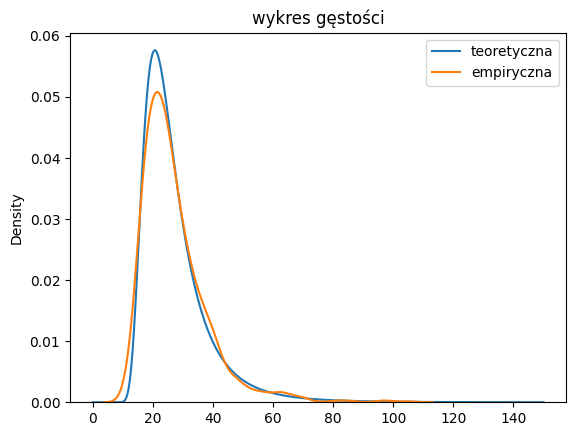

In [23]:
xss = np.linspace(0,150, 1000)
ys = [n*lognorm.cdf(x,s=sigma,loc=0, scale=1)**(n-1)*lognorm.pdf(x,s=sigma,loc=0, scale=1) for x in xss]
plt.plot(xss, ys, label= 'teoretyczna')
sns.kdeplot(data = Us2, label = 'empiryczna')
plt.legend()
plt.title('wykres gęstości')
plt.show()

### b) rozkład pareto

$\alpha =6, \lambda = 2$

In [85]:
mc = 1000
n = 1000
alfa = 2
lambd = 1
Us3 = []
for i in range(mc):
    us = [random.random() for _ in range(n)]
    Z = [lambd*((1-u)**(-1/alfa)-1) for u in us]
    U = max(Z)
    Us3.append(U)

In [ ]:
plt.hist(Us3, bins=50)

In [77]:
def fp(x,alfa = alfa, lambd=lambd):
    return alfa*lambd**alfa/(lambd+x)**(alfa+1)

In [78]:
def Fp(x,alfa=alfa,lambd=lambd):
    return 1- (lambd/(x+lambd))**alfa

In [86]:
def f(x, alfa, lambd):
    return 1000*Fp(x,alfa, lambd)**999*fp(x,alfa,lambd)

In [87]:
def F(x,alfa,lambd):
    return (Fp(x,alfa, lambd))**1000

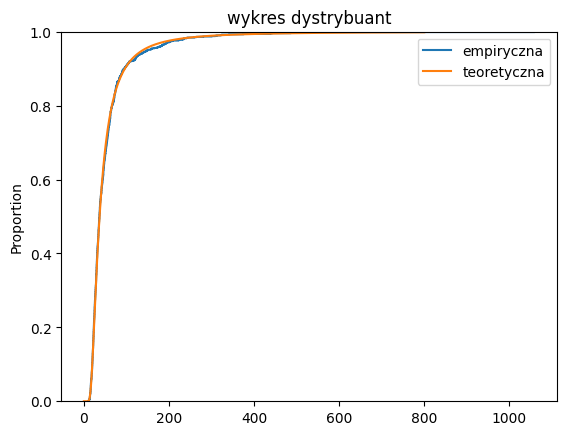

In [90]:
par = np.linspace(0, 800, 1000)
sns.ecdfplot(data=Us3, label='empiryczna')
plt.plot(par, F(par, alfa, lambd), label='teoretyczna')
plt.legend(loc="best")
plt.title('wykres dystrybuant')
plt.show()

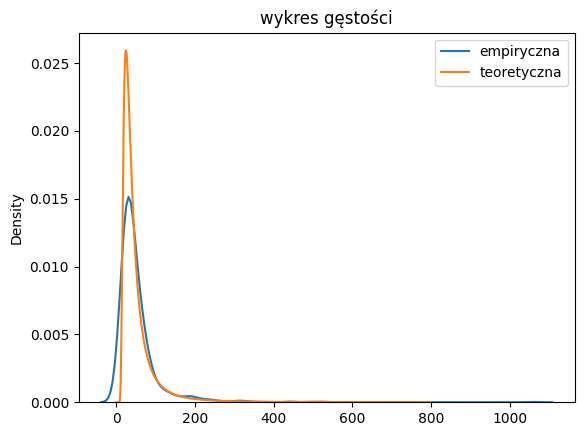

In [91]:
sns.kdeplot(data=Us3, label='empiryczna')
plt.plot(par, f(par, alfa, lambd), label='teoretyczna')
plt.legend()
plt.title('wykres gęstości')
plt.show()